In [3]:
!pip install -q openai-whisper

import whisper

model = whisper.load_model("base")
result = model.transcribe("a1.m4a", fp16=False)
print(result["text"])

 Hello, this is Miss Anna Alowra, Jail made by Cecil Moreau plus.


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2082,ham,I'm done oredi...,NaN,NaN,NaN
4889,ham,Sounds like there could be a lot of time spent...,NaN,NaN,NaN
4349,ham,Yes. Rent is very expensive so its the way we ...,NaN,NaN,NaN
4830,ham,Po de :-):):-):-):-). No need job aha.,NaN,NaN,NaN
1987,ham,No calls..messages..missed calls,NaN,NaN,NaN


### 1. Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['label'] = labelencoder.fit_transform(df['label'])

In [12]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

,0
label,0
text,0


In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

### 2. EDA

In [17]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['label'].value_counts()

,count
label,
0,4516
1,653


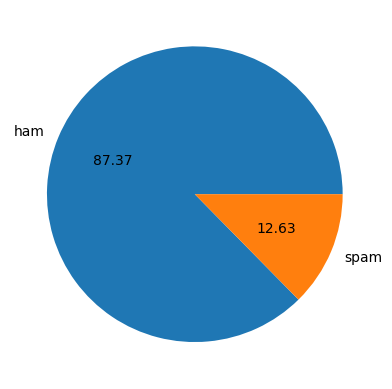

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [24]:
import nltk
print(nltk.__version__)
# nltk.download('punkt')
# nltk.download('punkt_tab')

3.9.1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
# No. of characters in each message
df['num_chars'] = df['text'].apply(len)

In [27]:
# No. of words in each message
df['num_words'] = df['text'].astype(str).apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
# No. of sentences in each message
df['num_sent'] = df['text'].astype(str).apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,label,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
(df[['num_chars', 'num_words', 'num_sent']].describe())

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Ham
df[df['label']==0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# Spam
df[df['label']==1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


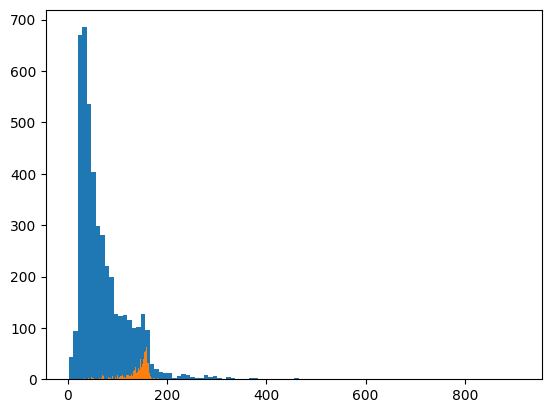

In [33]:
plt.hist(df[df['label']== 0]['num_chars'], bins=100)
plt.hist(df[df['label']== 1]['num_chars'], bins=100)
plt.show()

<Axes: xlabel='num_chars', ylabel='Count'>

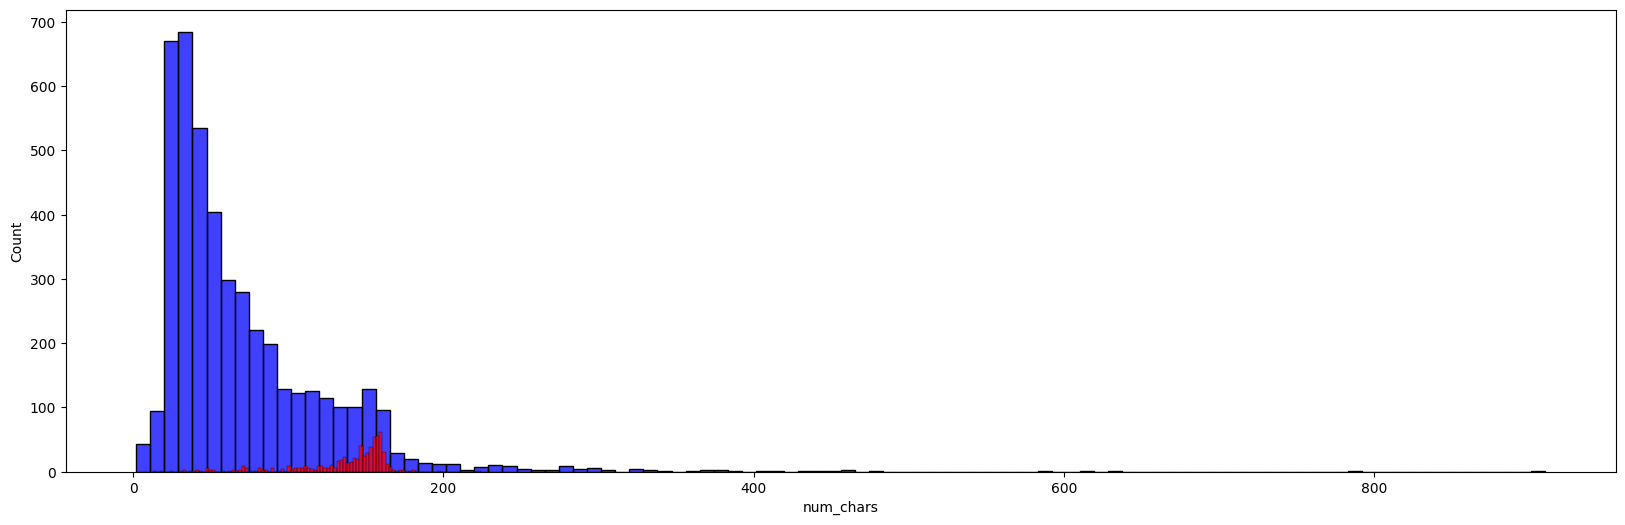

In [34]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.histplot(df[df['label']== 0]['num_chars'], bins=100,color='blue')
sns.histplot(df[df['label']== 1]['num_chars'], bins=100,color='red')

<Axes: xlabel='num_words', ylabel='Count'>

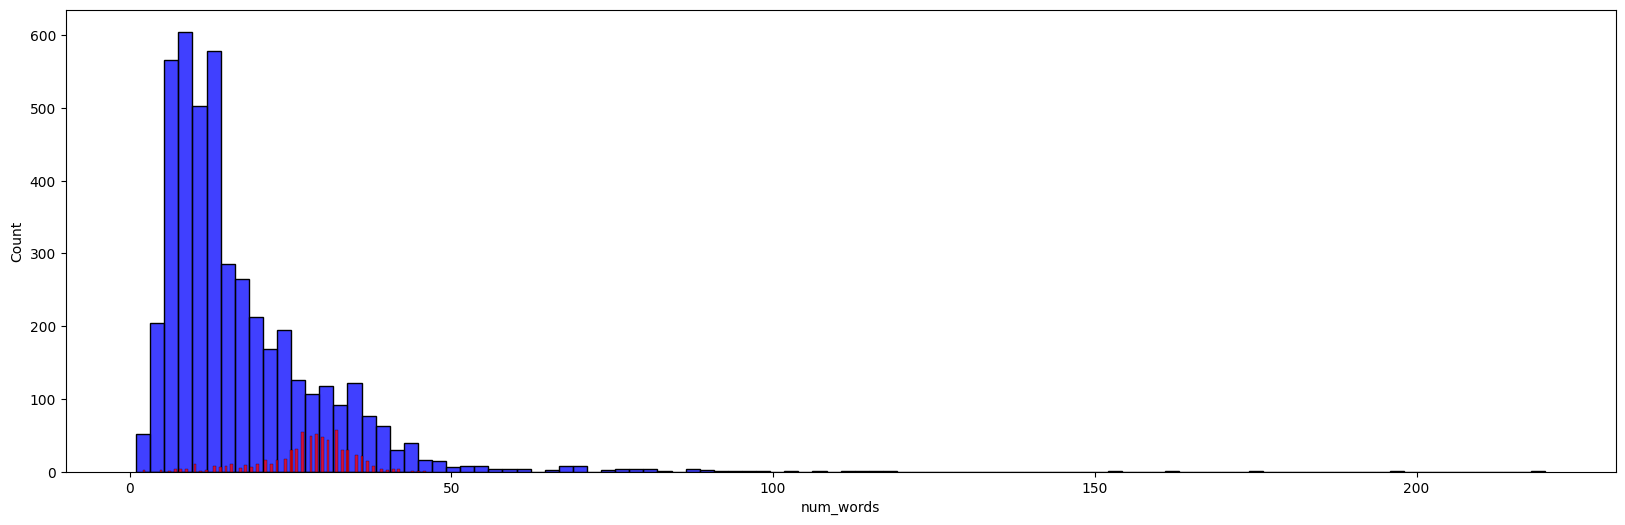

In [35]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.histplot(df[df['label']== 0]['num_words'], bins=100,color='blue')
sns.histplot(df[df['label']== 1]['num_words'], bins=100,color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

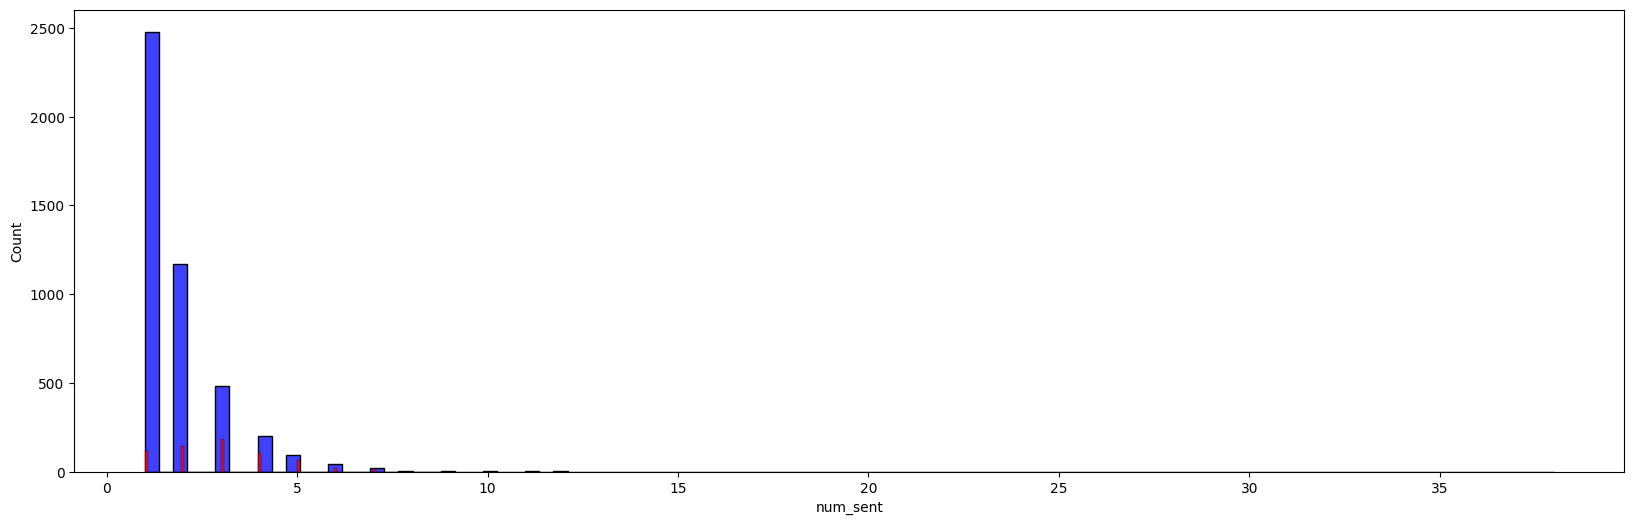

In [36]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.histplot(df[df['label']== 0]['num_sent'], bins=100,color='blue')
sns.histplot(df[df['label']== 1]['num_sent'], bins=100,color='red')

<Figure size 5000x5000 with 0 Axes>

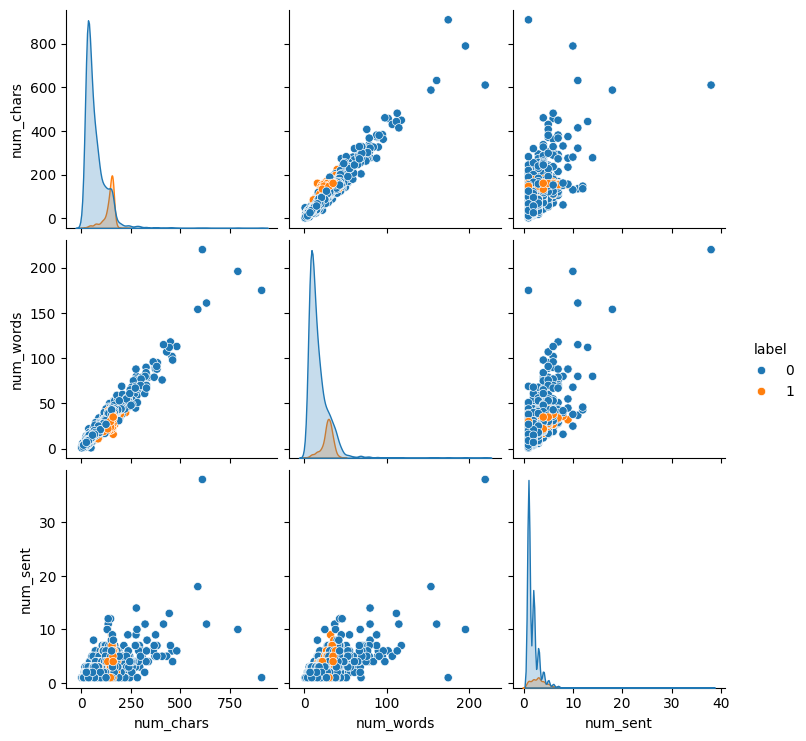

In [37]:
plt.figure(figsize=(50,50))
sns.pairplot(df,hue='label')
plt.show()

In [38]:
df

,label,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: >

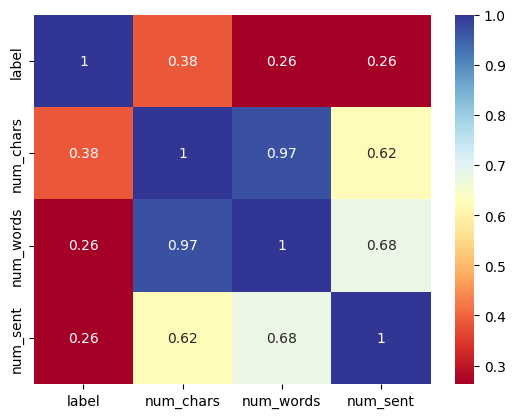

In [39]:
sns.heatmap(df.iloc[:][['label','num_chars','num_words','num_sent']].corr(),annot=True,cmap='RdYlBu')
# Since label is more dependent on number of words, we take num_words

## 3. Data Preprocessing
*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop word and punctuation
*   Stemming


In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

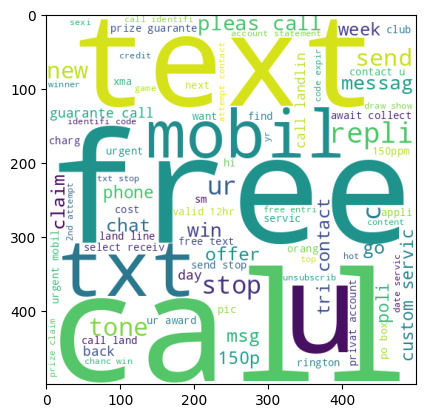

In [48]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

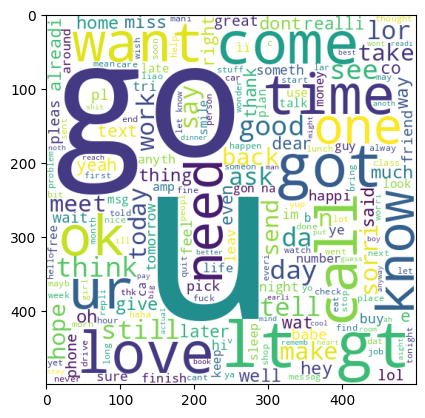

In [49]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [50]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
(len(spam_corpus),len(ham_corpus))

(9939, 35404)

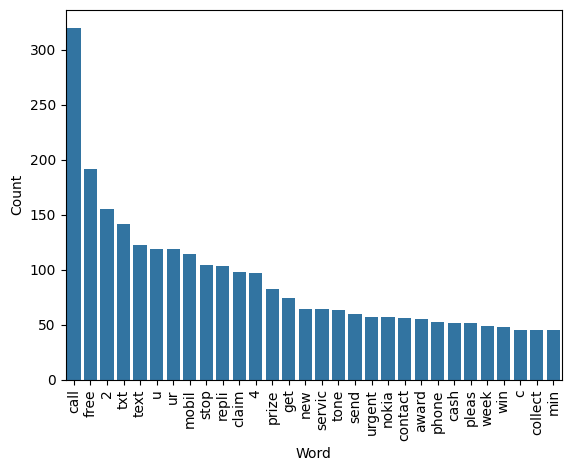

In [53]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame from Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the bar plot with named parameters
sns.barplot(x='Word', y='Count', data=word_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building


### Text Vectorization Methods:
1. CountVectorizer
2. TfidfVectorizer


In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
from sklearn.model_selection import train_test_split

X = df['transformed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()


In [56]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [57]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train_cv, y_train)
y_pred_gnb = gnb.predict(X_test_cv)
print(accuracy_score(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

0.8684719535783365
0.5185185185185185
[[772 117]
 [ 19 126]]


In [61]:
gnb.fit(X_train_tfidf, y_train)
y_pred_gnb = gnb.predict(X_test_cv)
print(accuracy_score(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

0.8704061895551257
0.5228215767634855
[[774 115]
 [ 19 126]]


In [62]:
mnb.fit(X_train_cv, y_train)
y_pred_mnb = mnb.predict(X_test_cv)
print(accuracy_score(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))

0.9796905222437138
0.9492753623188406
[[882   7]
 [ 14 131]]


In [63]:
mnb.fit(X_train_tfidf, y_train)
y_pred_mnb = mnb.predict(X_test_cv)
print(accuracy_score(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))

0.97678916827853
0.984
[[887   2]
 [ 22 123]]


In [64]:
bnb.fit(X_train_cv,y_train)
y_pred_bnb = bnb.predict(X_test_cv)
print(accuracy_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))

0.965183752417795
0.9823008849557522
[[887   2]
 [ 34 111]]


In [65]:
bnb.fit(X_train_tfidf,y_train)
y_pred_bnb = bnb.predict(X_test_cv)
print(accuracy_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))

0.965183752417795
0.9823008849557522
[[887   2]
 [ 34 111]]


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [69]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [70]:
train_classifier(svc,X_train_cv,y_train,X_test_cv,y_test)

(0.9323017408123792, 0.7737226277372263)

In [71]:
X_train=X_train_tfidf
X_test=X_test_tfidf

In [76]:
import pickle
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))